In [1]:
import os
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
%time df = pd.read_csv(r"D:\Nhan\Data\XTX_data.csv")

print(df.shape)
df.head(10)

Wall time: 13.5 s
(2999999, 61)


,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,...,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,1619.5,1620.0,1621.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
1,1619.5,1620.0,1621.0,1621.5,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
2,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
4,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
5,1619.5,1620.0,1621.0,1621.5,1622.0,NaN,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
6,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,NaN,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
7,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,NaN,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
8,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
9,1619.5,1620.0,1621.0,1621.5,1622.0,1623.0,1623.5,1624.0,NaN,NaN,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5


In [3]:
df = df.fillna(0)
df.head()

,askRate0,askRate1,askRate2,askRate3,askRate4,askRate5,askRate6,askRate7,askRate8,askRate9,...,bidSize6,bidSize7,bidSize8,bidSize9,bidSize10,bidSize11,bidSize12,bidSize13,bidSize14,y
0,1619.5,1620.0,1621.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
1,1619.5,1620.0,1621.0,1621.5,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
2,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
3,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5
4,1619.5,1620.0,1621.0,1621.5,1622.0,0.0,0.0,0.0,0.0,0.0,...,20.0,27.0,11.0,14.0,35.0,10.0,1.0,10.0,13.0,-0.5


In [4]:
y = df.iloc[:, -1].cumsum()

def train_test_split(df, p_train = 0.667):
    N = len(df)
    y = df.y.cumsum()
    train_size = int(p_train*N)
    X_train = df.iloc[: train_size, :-1]
    y_train = y[: train_size]
    X_test = df.iloc[train_size :, :-1]
    y_test = y[train_size :]
    
    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = train_test_split(df, 0.7)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2099999, 60), (900000, 60), (2099999,), (900000,))

In [5]:
reg = xgb.XGBRegressor(n_estimators = 10000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds = 50,
        verbose = 2)

[0]	validation_0-rmse:2275.66699	validation_1-rmse:3340.00684
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[2]	validation_0-rmse:1125.37756	validation_1-rmse:1732.17798
[4]	validation_0-rmse:569.35468	validation_1-rmse:947.19104
[6]	validation_0-rmse:308.84671	validation_1-rmse:568.90625
[8]	validation_0-rmse:197.56244	validation_1-rmse:389.90729
[10]	validation_0-rmse:156.35960	validation_1-rmse:310.79242
[12]	validation_0-rmse:142.03740	validation_1-rmse:277.51315
[14]	validation_0-rmse:134.19113	validation_1-rmse:261.94898
[16]	validation_0-rmse:130.04761	validation_1-rmse:255.69847
[18]	validation_0-rmse:126.97958	validation_1-rmse:252.78227
[20]	validation_0-rmse:124.67215	validation_1-rmse:250.89746
[22]	validation_0-rmse:122.85513	validation_1-rmse:250.87627
[24]	validation_0-rmse:120.98587	validation_1-rmse:251.04146
[26]	validation_0-rmse:118.26141	validation_1-rms

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

### `Feature Importances`
**`Feature importance`** is a great way to get a general idea about which features the model is relying on most to make the prediction. 

This is a metric that simply sums up how many times each feature is split on.

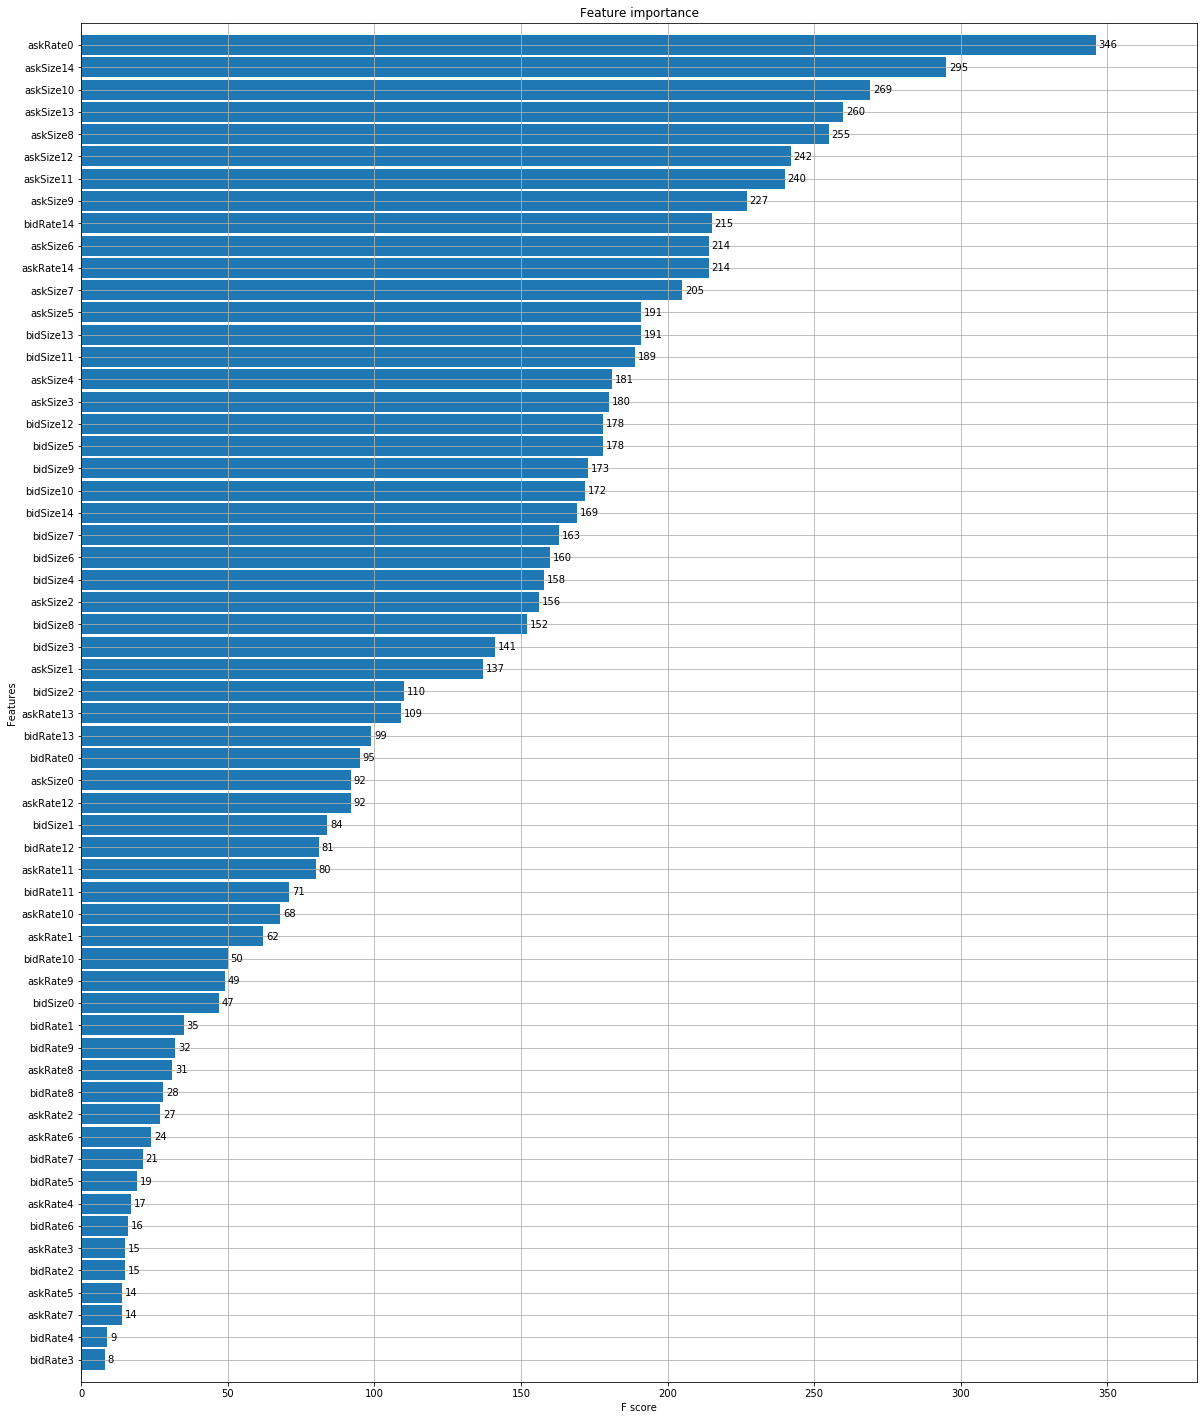

In [6]:
fig, ax = plt.subplots(1,1, figsize = (20, 25))
plot_importance(reg, height = 0.9, ax = ax);

### Forecasting the `test-set`

#### Visualization

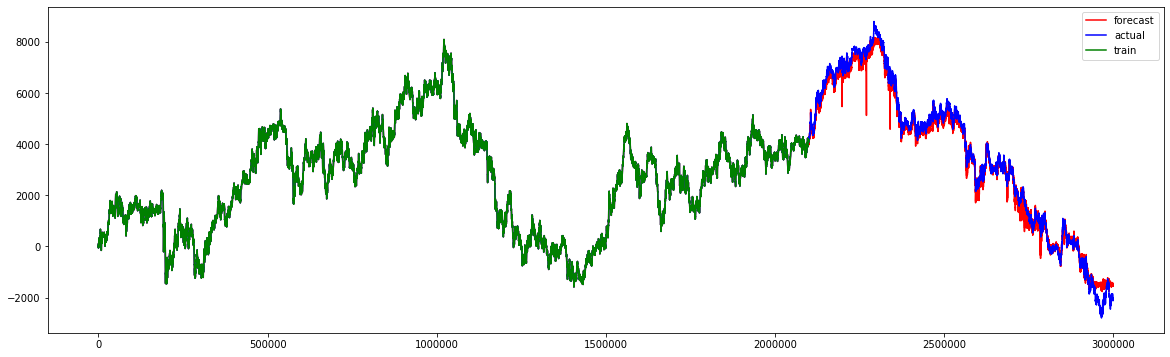

In [7]:
pred = reg.predict(X_test)
forecast = np.concatenate((y_train, pred))
plt.figure(figsize = (20, 6))
plt.plot(forecast, 'red', label = 'forecast')
plt.plot(y, 'blue', label = 'actual')
plt.plot(y_train, 'green', label = 'train')
plt.legend(loc = 'best')
plt.show()

#### Focus on the `test-set` only

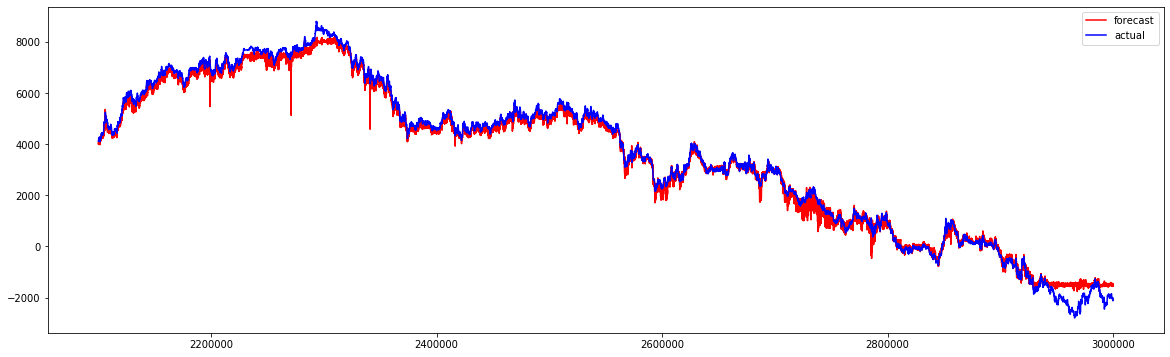

In [8]:
plt.figure(figsize = (20, 6))
plt.plot(range(len(y_train), len(y)), pred, 'red', label = 'forecast')
plt.plot(range(len(y_train), len(y)), y_test, 'blue', label = 'actual')
plt.legend(loc = 'best')
plt.show()

### Error Metrics On Test Set

In [9]:
from statsmodels.tsa.stattools import acf

def forecast_accuracy(forecast, actual):
    
    ## assign zero values in y_test to 0.0001
    actual = [act if act > 0 else 0.001 for act in actual]
    
    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  
    
    # Mean Error (ME)
    me = np.mean(forecast - actual)  
    
    # Mean Absolute Error (MAE)
    mae = np.mean(np.abs(forecast - actual))
    
    # Mean Percentage Error (MPE)
    mpe = np.mean((forecast - actual)/actual)
    
    # Root Mean Squared Error (RMSE)
    rmse = np.mean((forecast - actual)**2)**.5 
    
    # correlation
    corr = np.corrcoef(forecast, actual)[0,1]    
        
    # Lag 1 Autocorrelation of Error (ACF1) 
    acf1 = acf(forecast - actual, fft = False)[1] 
    
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr})

%time forecast_accuracy(pred, y_test)

Wall time: 2min 3s


{'mape': 1485.9114192587722,
 'me': -263.11597714532144,
 'mae': 278.752192750145,
 'mpe': -1477.166435162711,
 'rmse': 476.60226180840476,
 'acf1': 0.998121393508838,
 'corr': 0.9912755743920301}

The `high- mape` explained that there are almost values of `predictions = 0` while the `actual_value` was not!

The `me & mpe` be negative explained that almost data-points in the `forecast` is lower than in the `actual`

The high `corr` explained that there are a high-correlation between `actual` & `forecast` while the high `acf1` explained that the `autocovariance` at `lag 1` is apporximate `0.99812` the whole variance on the `test-set`